In [6]:
import numpy as np
import matplotlib.pyplot as plt

# **Problem 1** #

## a) ##

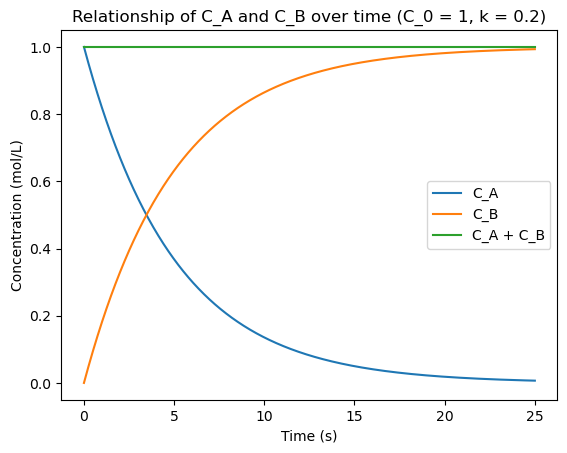

In [16]:
def C_A(t, C_0, k):
    return C_0 * np.exp(-k * t)

def C_B(t, C_0, k):
    return C_0 * (1 - np.exp(-k * t))

t_arr = np.linspace(0, 25, 1000)
k = 0.2
C_0 = 1

plt.plot(t_arr, C_A(t_arr, C_0, k), label='C_A')
plt.plot(t_arr, C_B(t_arr, C_0, k), label='C_B')
plt.plot(t_arr, C_A(t_arr, C_0, k) + C_B(t_arr, C_0, k), label='C_A + C_B')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/L)')
plt.title('Relationship of C_A and C_B over time (C_0 = 1, k = 0.2)')
plt.legend()
plt.show()


## b) ##

In [ ]:
def C_A(t, C_0, k):
    return C_0 * np.exp(-k * t)

def C_B(t, C_0, k):
    return C_0 * (1 - np.exp(-k * t))

t_arr = np.linspace(0, 25, 1000)
k = 0.2
C_0 = 1

plt.plot(t_arr, C_A(t_arr, C_0, k), label='C_A')
plt.plot(t_arr, C_B(t_arr, C_0, k), label='C_B')
plt.plot(t_arr, C_A(t_arr, C_0, k) + C_B(t_arr, C_0, k), label='C_A + C_B')
plt.xlabel('Time (s)')
plt.ylabel('Concentration')
plt.title('Relationship of C_A and C_B over time (C_0 = 1, k = 0.2)')
plt.legend()
plt.show()

## c) ##

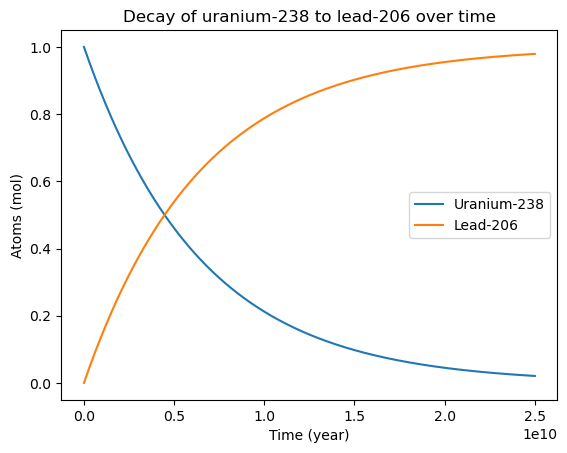

In [15]:
def uranium(t, N_0, tau):
    k = np.log(2) / tau
    return N_0 * np.exp(-k * t)


def lead(t, N_0, tau):
    k = np.log(2) / tau
    return N_0 * (1 - np.exp(-k * t))


t_arr = np.linspace(0, 25E9, 1000)
tau = 4.47E9        # in years
N_0 = 1             # in mol

plt.plot(t_arr, uranium(t_arr, N_0, tau), label='Uranium-238')
plt.plot(t_arr, lead(t_arr, N_0, tau), label='Lead-206')
plt.xlabel('Time (year)')
plt.ylabel('Atoms (mol)')
plt.title('Decay of uranium-238 to lead-206 over time')
plt.legend()
plt.show()